In [1]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [30]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [31]:
X_train.shape

(60000, 28, 28)

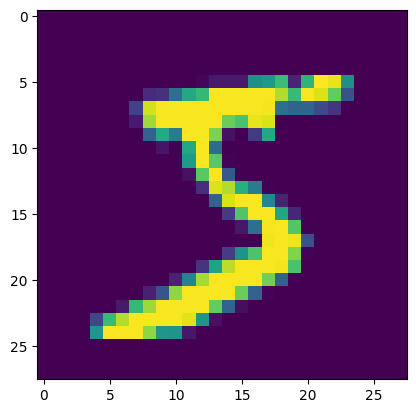

In [32]:
plt.imshow(X_train[0])

In [33]:
# flatten the image into one-dimensional vector
num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [34]:
X_train = X_train / 255
X_test = X_test / 255

In [35]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


In [36]:
def classification_model():


    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))


    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [37]:
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 14s - 8ms/step - accuracy: 0.9428 - loss: 0.1862 - val_accuracy: 0.9683 - val_loss: 0.1028
Epoch 2/10
1875/1875 - 12s - 7ms/step - accuracy: 0.9754 - loss: 0.0795 - val_accuracy: 0.9730 - val_loss: 0.0903
Epoch 3/10
1875/1875 - 12s - 7ms/step - accuracy: 0.9833 - loss: 0.0538 - val_accuracy: 0.9757 - val_loss: 0.0766
Epoch 4/10
1875/1875 - 12s - 7ms/step - accuracy: 0.9870 - loss: 0.0409 - val_accuracy: 0.9718 - val_loss: 0.0997
Epoch 5/10
1875/1875 - 12s - 6ms/step - accuracy: 0.9898 - loss: 0.0322 - val_accuracy: 0.9719 - val_loss: 0.0977
Epoch 6/10
1875/1875 - 12s - 6ms/step - accuracy: 0.9914 - loss: 0.0267 - val_accuracy: 0.9792 - val_loss: 0.0806
Epoch 7/10
1875/1875 - 12s - 6ms/step - accuracy: 0.9928 - loss: 0.0217 - val_accuracy: 0.9814 - val_loss: 0.0769
Epoch 8/10
1875/1875 - 12s - 6ms/step - accuracy: 0.9939 - loss: 0.0191 - val_accuracy: 0.9795 - val_loss: 0.0972
Epoch 9/10
1875/1875 - 13s - 7ms/step - accuracy: 0.9951 - loss: 0.0155 - val_accuracy: 

In [38]:
scores

[0.08942421525716782, 0.9805999994277954]

In [39]:
print(f"Accuracy: {scores[1]}")

Accuracy: 0.9805999994277954


In [40]:
print(f"Error: {1 - scores[1]}")

Error: 0.01940000057220459


In [42]:
model.save("classification_model.keras")

In [43]:
pretrained_model = keras.saving.load_model("classification_model.keras")

In [44]:
def classification_model_6layers():
    # create model

    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))


    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# build the model
model_6layers = classification_model_6layers()

# fit the model
model_6layers.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores_6layers = model_6layers.evaluate(X_test, y_test, verbose=0)

print('Accuracy_3_layers: {}% \n Accuracy_6_layers: {}'.format(scores[1], scores_6layers[1]))

Epoch 1/10
1875/1875 - 15s - 8ms/step - accuracy: 0.9346 - loss: 0.2181 - val_accuracy: 0.9603 - val_loss: 0.1320
Epoch 2/10
1875/1875 - 13s - 7ms/step - accuracy: 0.9714 - loss: 0.1003 - val_accuracy: 0.9735 - val_loss: 0.0889
Epoch 3/10
1875/1875 - 12s - 7ms/step - accuracy: 0.9788 - loss: 0.0720 - val_accuracy: 0.9742 - val_loss: 0.0973
Epoch 4/10
1875/1875 - 13s - 7ms/step - accuracy: 0.9836 - loss: 0.0566 - val_accuracy: 0.9721 - val_loss: 0.0988
Epoch 5/10
1875/1875 - 13s - 7ms/step - accuracy: 0.9862 - loss: 0.0464 - val_accuracy: 0.9792 - val_loss: 0.0832
Epoch 6/10
1875/1875 - 14s - 8ms/step - accuracy: 0.9881 - loss: 0.0405 - val_accuracy: 0.9781 - val_loss: 0.0840
Epoch 7/10
1875/1875 - 12s - 6ms/step - accuracy: 0.9904 - loss: 0.0329 - val_accuracy: 0.9809 - val_loss: 0.0840
Epoch 8/10
1875/1875 - 12s - 7ms/step - accuracy: 0.9908 - loss: 0.0300 - val_accuracy: 0.9808 - val_loss: 0.0833
Epoch 9/10
1875/1875 - 12s - 7ms/step - accuracy: 0.9926 - loss: 0.0273 - val_accuracy: 

In [45]:
#load the saved model
pretrained_model = keras.saving.load_model('classification_model.keras')

print("Pre-trained model loaded successufully")

# Further train the loaded model
pretrained_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores_20_epochs = pretrained_model.evaluate(X_test, y_test, verbose=0)
print('Accuracy_10_epochs: {}% \n Accuracy_20_epochs: {}'.format(scores[1], scores_20_epochs[1]))

Pre-trained model loaded successufully
Epoch 1/10
1875/1875 - 12s - 7ms/step - accuracy: 0.9950 - loss: 0.0160 - val_accuracy: 0.9798 - val_loss: 0.0952
Epoch 2/10
1875/1875 - 13s - 7ms/step - accuracy: 0.9958 - loss: 0.0125 - val_accuracy: 0.9810 - val_loss: 0.0977
Epoch 3/10
1875/1875 - 12s - 6ms/step - accuracy: 0.9961 - loss: 0.0120 - val_accuracy: 0.9805 - val_loss: 0.1051
Epoch 4/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9964 - loss: 0.0121 - val_accuracy: 0.9818 - val_loss: 0.0998
Epoch 5/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9966 - loss: 0.0118 - val_accuracy: 0.9815 - val_loss: 0.1021
Epoch 6/10
1875/1875 - 12s - 6ms/step - accuracy: 0.9961 - loss: 0.0129 - val_accuracy: 0.9800 - val_loss: 0.1319
Epoch 7/10
1875/1875 - 13s - 7ms/step - accuracy: 0.9969 - loss: 0.0110 - val_accuracy: 0.9809 - val_loss: 0.1182
Epoch 8/10
1875/1875 - 12s - 6ms/step - accuracy: 0.9966 - loss: 0.0108 - val_accuracy: 0.9807 - val_loss: 0.1176
Epoch 9/10
1875/1875 - 11s - 6ms/step - accuracy: